<a href="https://www.kaggle.com/code/humagonen/ocr-optical-character-recognition?scriptVersionId=174043876" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="background-color:darkcyan;font-family:newtimeroman;font-size:180%;color:white;text-align:center;border-radius:10px 10px;"><b> Pulling out text in images and videos with OCR


## Steps in this Notebook:

- install easyocr
- define Reader and specify languages
- read text in image
- read text in video with easyocr
- read text in video (filter the most occurring text to display)

In [ ]:
# pip install easyocr

In [ ]:
import easyocr
import cv2
import matplotlib.pyplot as plt

In [ ]:
reader = easyocr.Reader(['tr', 'en'], gpu=True) # define a Reader and specify languages

# <p style="background-color:darkcyan;font-family:newtimeroman;font-size:130%;color:white;text-align:center;border-radius:10px 10px;"><b> Read text in images

# 1.1 First Image

In [ ]:
img = cv2.imread('/kaggle/input/my-images/tourism.jpg')

# OpenCV loads images in BGR format, we need to convert it to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis
plt.show()


In [ ]:
results = reader.readtext(img, detail=1, paragraph=True) # read text in image with reader object

# detail = 1 brings detailed result

results

## It recognized the sign behind that even my eyes can't see :) 

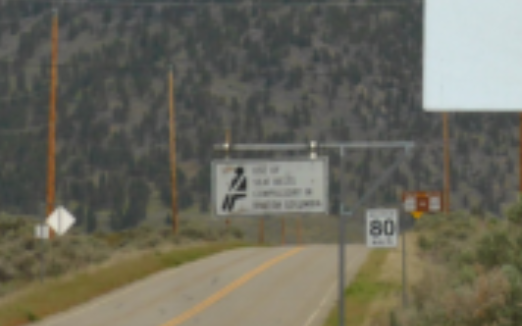

In [ ]:
results = reader.readtext(img, detail=0, paragraph=True)  #  detail=0  ,  paragraph= True

results

In [ ]:
results = reader.readtext(img)   # default  -> detail = 1  ,  paragraph = False

results

# 1.2 Second image

In [ ]:
img2 = cv2.imread('/kaggle/input/my-images/email.png')

img_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
results = reader.readtext(img2, detail=0, paragraph=True) 
results

# <p style="background-color:darkcyan;font-family:newtimeroman;font-size:130%;color:white;text-align:center;border-radius:10px 10px;"><b> Read text in video 

# The Video:

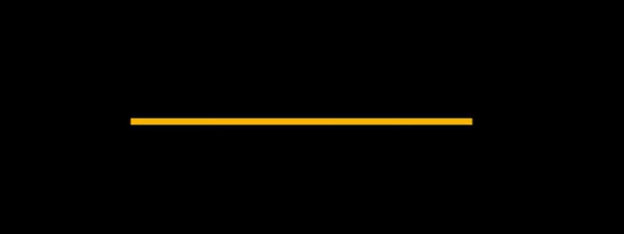

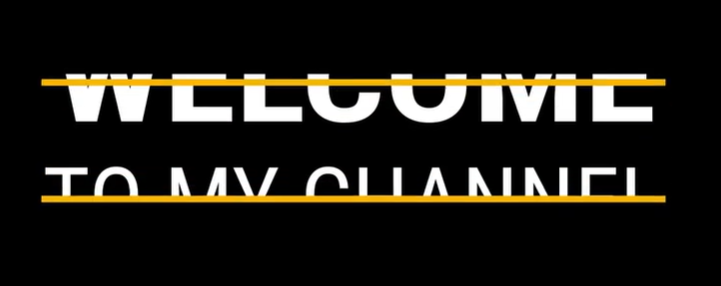

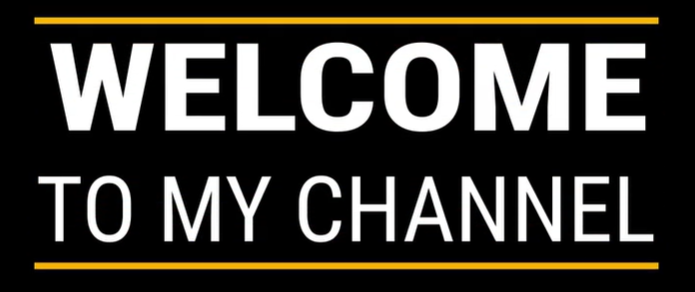

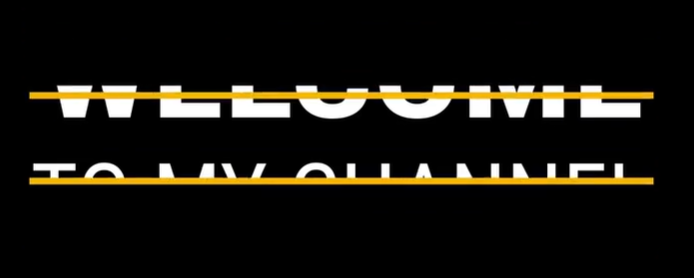

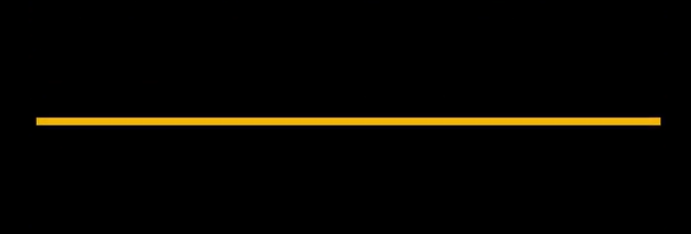

# 2.1 Reading text in each frame:

In [ ]:
video_path = '/kaggle/input/my-video/vid.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Loop through frames
while cap.isOpened():
    # Read the frame
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Perform text recognition on the frame
    result = reader.readtext(frame)
    
    # Display the recognized text
    for detection in result:
        text = detection[1]
        print(text)
    
# Release the video capture object
cap.release()


# 2.2 Filter the most occurring text

In [ ]:
from collections import Counter

video_path = '/kaggle/input/my-video/vid.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# List to store all detected text across frames
all_texts = []

# Loop through frames
while cap.isOpened():
    # Read the frame
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Perform text recognition on the frame
    result = reader.readtext(frame)
    
    # Extract all text from the current frame
    frame_texts = [detection[1] for detection in result]
    
    # Update all_texts with text from the current frame
    all_texts.extend(frame_texts)
    
# Release the video capture object
cap.release()

# Perform word frequency analysis
word_counts = Counter(all_texts)

# Filter out all occurrences of the most occurring text
filtered_texts = [text for text in word_counts.keys() if word_counts[text] >= 10] # you can adjust the occurrency number

# Display the filtered text
for text in filtered_texts:
    print(text)


In [ ]:
word_counts

# <p style="background-color:darkcyan;font-family:newtimeroman;font-size:130%;color:white;text-align:center;border-radius:10px 10px;"><b> Thank You!